# Exercise 2: Gradient boosting

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## 10 moon datasets

In [51]:
list_noise = np.arange(0, 10, 1)
moons = {}

for noise in list_noise:
    this_noise = noise*0.001
    moons[noise] = {}
    moons[noise]["features"], moons[noise]["labels"] = make_moons(n_samples=100, noise=this_noise, random_state=3116)
    

## Plot the moons

Text(0.5, 1.0, 'Dataset: 0')

Text(0.5, 1.0, 'Dataset: 1')

Text(0.5, 1.0, 'Dataset: 2')

Text(0.5, 1.0, 'Dataset: 3')

Text(0.5, 1.0, 'Dataset: 4')

Text(0.5, 1.0, 'Dataset: 5')

Text(0.5, 1.0, 'Dataset: 6')

Text(0.5, 1.0, 'Dataset: 7')

Text(0.5, 1.0, 'Dataset: 8')

Text(0.5, 1.0, 'Dataset: 9')

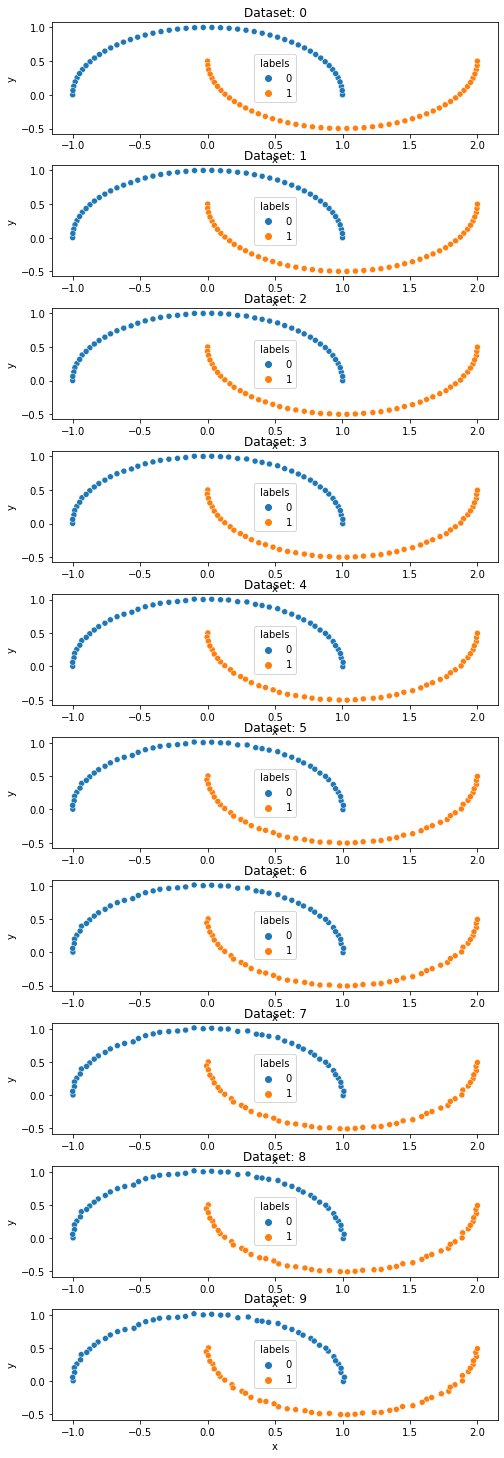

In [64]:
f, axes = plt.subplots(10, 1, figsize=(7, 20))
f.tight_layout()

for noise in list_noise:
    df = pd.DataFrame(moons[noise]["features"], columns=["x", "y"])
    df["labels"] = moons[noise]["labels"]
    
    sns.scatterplot(data=df, x="x", y="y", hue="labels", ax = axes[noise]).set_title("Dataset: {}".format(noise))
    

## Joint dataset 

In [55]:
dfs = []

for moon in moons:
    df = pd.DataFrame(moons[noise]["features"], columns=["x", "y"])
    df["labels"] = moons[noise]["labels"]
    dfs.append(df)
    
df = pd.concat(dfs)

df.shape

(1000, 3)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    df[["x", "y"]], df["labels"], test_size=0.15, random_state=3116)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.15, random_state=1)

## Grid search for nb_trees

In [62]:
nb_trees = np.arange(3, 30, 3)
learning_rate = 0.05

accuracies_train = {}
accuracies_valid = {}

for tree in nb_trees:
    lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
    gb_clf = GradientBoostingClassifier(n_estimators=tree, 
                                        learning_rate=learning_rate, 
                                        max_features=2, 
                                        max_depth=2, 
                                        random_state=3116)
    gb_clf.fit(X_train, y_train)

    
    accuracies_train[tree] = gb_clf.score(X_train, y_train)
    accuracies_valid[tree] = gb_clf.score(X_val, y_val)

print("Accuracies on training set with number of trees", accuracies_train)

print("Accuracies on validation set with number of trees", accuracies_train)
    

GradientBoostingClassifier(learning_rate=0.05, max_depth=2, max_features=2,
                           n_estimators=3, random_state=3116)

GradientBoostingClassifier(learning_rate=0.05, max_depth=2, max_features=2,
                           n_estimators=6, random_state=3116)

GradientBoostingClassifier(learning_rate=0.05, max_depth=2, max_features=2,
                           n_estimators=9, random_state=3116)

GradientBoostingClassifier(learning_rate=0.05, max_depth=2, max_features=2,
                           n_estimators=12, random_state=3116)

GradientBoostingClassifier(learning_rate=0.05, max_depth=2, max_features=2,
                           n_estimators=15, random_state=3116)

GradientBoostingClassifier(learning_rate=0.05, max_depth=2, max_features=2,
                           n_estimators=18, random_state=3116)

GradientBoostingClassifier(learning_rate=0.05, max_depth=2, max_features=2,
                           n_estimators=21, random_state=3116)

GradientBoostingClassifier(learning_rate=0.05, max_depth=2, max_features=2,
                           n_estimators=24, random_state=3116)

GradientBoostingClassifier(learning_rate=0.05, max_depth=2, max_features=2,
                           n_estimators=27, random_state=3116)

Accuracies on training set with number of trees {3: 0.9293628808864266, 6: 0.9293628808864266, 9: 0.9293628808864266, 12: 0.9293628808864266, 15: 0.9293628808864266, 18: 0.9293628808864266, 21: 0.9293628808864266, 24: 0.9293628808864266, 27: 0.9293628808864266}
Accuracies on validation set with number of trees {3: 0.9293628808864266, 6: 0.9293628808864266, 9: 0.9293628808864266, 12: 0.9293628808864266, 15: 0.9293628808864266, 18: 0.9293628808864266, 21: 0.9293628808864266, 24: 0.9293628808864266, 27: 0.9293628808864266}


In [66]:
optimal_nb_trees = max(accuracies_valid, key=accuracies_valid.get)

print(optimal_nb_trees)

3


## Try out on test set

In [68]:
gb_clf = GradientBoostingClassifier(n_estimators=optimal_nb_trees,
                                    learning_rate=learning_rate,
                                    max_features=2,
                                    max_depth=2,
                                    random_state=3116)
gb_clf.fit(X_train, y_train)

print("Accuracy score (training): {0:.3f}".format(
    gb_clf.score(X_train, y_train)))
print("Accuracy score (test): {0:.3f}".format(
    gb_clf.score(X_test, y_test)))

GradientBoostingClassifier(learning_rate=0.05, max_depth=2, max_features=2,
                           n_estimators=3, random_state=3116)

Accuracy score (training): 0.929
Accuracy score (test): 0.907
